In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import choice

## Bootstrapping and Central Limit Theorem

Bootstrapping a distribution allows one to continuously sample a distribution to calculate mean and standard devation. By plotting the histogram or distribution, one can estimate the mean and standard deviation of the underlying distribution.

This is a direct application of the the **Central Limit Theorem**.

We first draw 20 data points from a uniform distribution $X \sim U[0, 5]$, then we sample 20 datapoints with replacement from the original sample $s$

In [6]:
s = np.random.uniform(0, 5, 20)

In [7]:
n = 10000
mean = np.zeros(n)
std = np.zeros(n)

for i in range(n):
    sample = choice(s, size=20, replace=True)
    mean[i] = sample.mean()
    std[i] = sample.std()

(array([  2.,   0.,   1.,   1.,   0.,   2.,   2.,   1.,   2.,   1.,   4.,
          4.,   9.,   4.,   8.,  10.,  13.,  15.,  15.,  18.,  19.,  23.,
         41.,  42.,  37.,  39.,  42.,  64.,  74.,  83., 107., 101.,  97.,
        141., 132., 161., 154., 167., 240., 213., 222., 223., 239., 274.,
        278., 327., 295., 279., 309., 298., 304., 314., 323., 270., 265.,
        284., 275., 256., 253., 241., 230., 232., 205., 208., 166., 172.,
        136., 126., 117., 129.,  91.,  88.,  77.,  75.,  52.,  53.,  45.,
         32.,  30.,  25.,  19.,  15.,  11.,   8.,  13.,   7.,   6.,   1.,
          3.,   3.,   0.,   3.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,
          1.]),
 array([1.18791199, 1.21435969, 1.24080738, 1.26725507, 1.29370276,
        1.32015046, 1.34659815, 1.37304584, 1.39949353, 1.42594123,
        1.45238892, 1.47883661, 1.5052843 , 1.531732  , 1.55817969,
        1.58462738, 1.61107508, 1.63752277, 1.66397046, 1.69041815,
        1.71686585, 1.74331354, 1.76976123, 1.

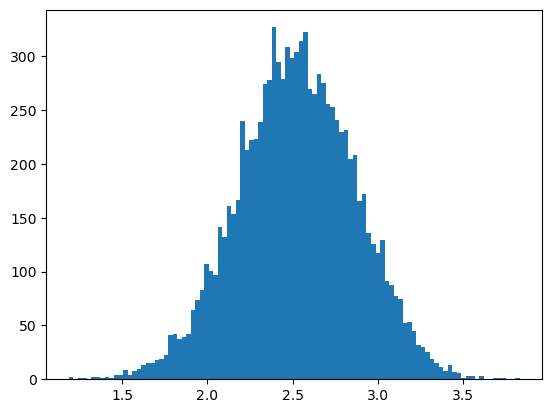

In [8]:
plt.hist(mean, bins=100)

Observing this histogram, we see a familiar gaussian distribution, with mean around 2.5. But how is this possible?

> Central Limit Theorem:
If $X \sim Dist(\mu, \sigma)$ (X drawn from an arbitrary distribution with unknown mean $\mu$ and standard deviation $\sigma$), and we draw N samples from the distribution, them the average $\bar{X} \sim N(\bar{X}, \frac{\sigma^2}{n})$ as $n\rightarrow \infty$ 

This is very powerful, which is a factor that is used in many scientific settings (e.g. Measuring a value over and over again to determine its true value). The more data points (draws from the distribution), the better we are at estimating the mean $mu$ and standard devation $\sigma$.

To illustrate this, let's go back to the uniform distribtuion example above. Let's see if the mean and standard deviation calculated is consistent, this time, we will do things slightly differently, by generating an initial sample of 10000 points from the same uniform distribution, but this time, we sample without replacement of size 10, calculate the mean and plot them for subsample iteration of 8, 16, 32, 64, 128, 256, 512, 1024. 

In [10]:
s = np.random.uniform(0, 5, 10000)

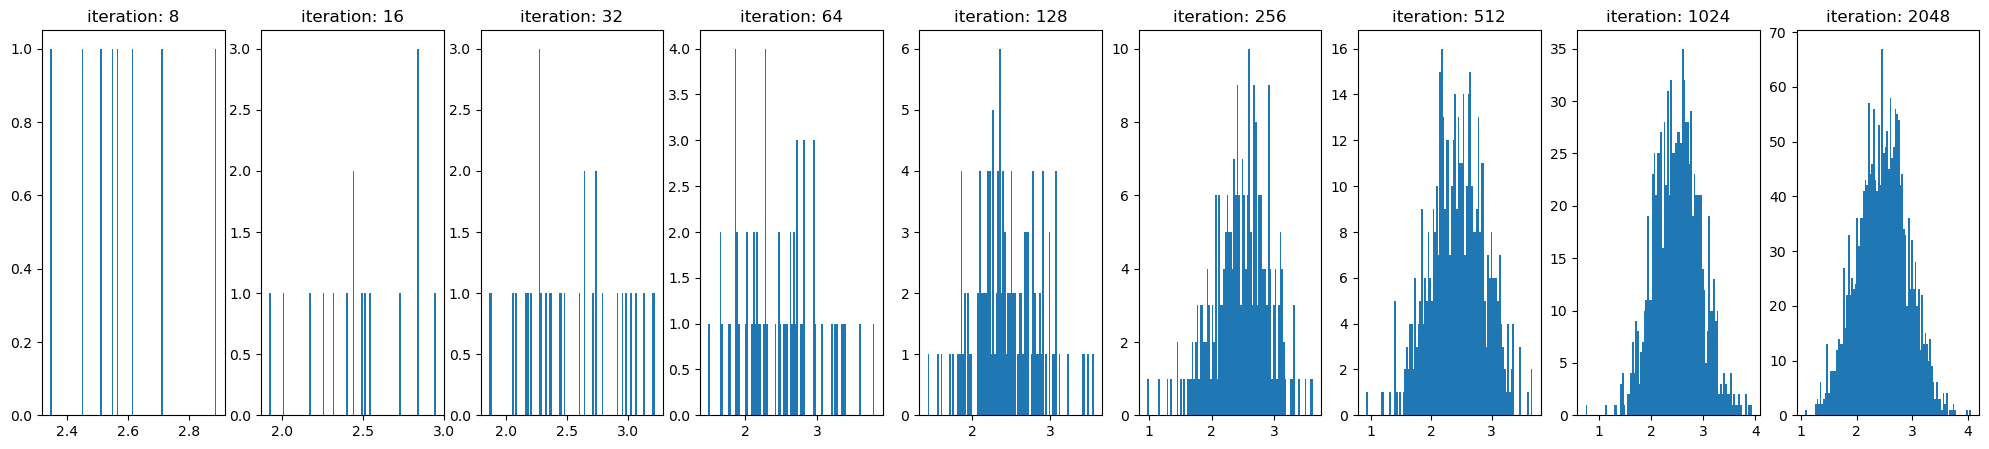

In [33]:
subsample_size = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
fig, ax = plt.subplots(1, len(subsample_size))
fig.set_size_inches(25, 5)

ax = ax.flatten()
std = np.zeros(len(subsample_size))

for idx, n in enumerate(subsample_size):
    mean = np.zeros(n)
    for i in range(n):
        sample = choice(s, size=10, replace=False)
        mean[i] = sample.mean()
    std[idx] = mean.std()
    ax[idx].hist(mean, bins=100)
    ax[idx].set_title('iteration: ' + str(n))

In [32]:
mean.std()

0.4607427369757056

Since the variance of a uniform distribution from $[0, 5]$ is $\frac{1}{12} (5)^2$, the standard deviation:

$$\sigma = \sqrt{\frac{25}{12}}$$

and the sample size we used is 10. Theoretically, we should get a sample standard deviation of:

$$\sqrt{\frac{25}{12 \cdot 10}} \approx 0.45$$

Which is what we see

### Covergence of standard deviation

Text(0, 0.5, 'standard deviation')

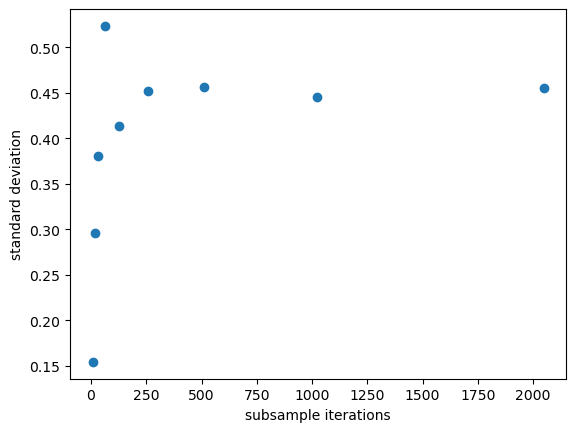

In [36]:
plt.scatter(subsample_size, std)
plt.xlabel('subsample iterations')
plt.ylabel('standard deviation')

### Convergence of subsample size: $\sqrt{n}$

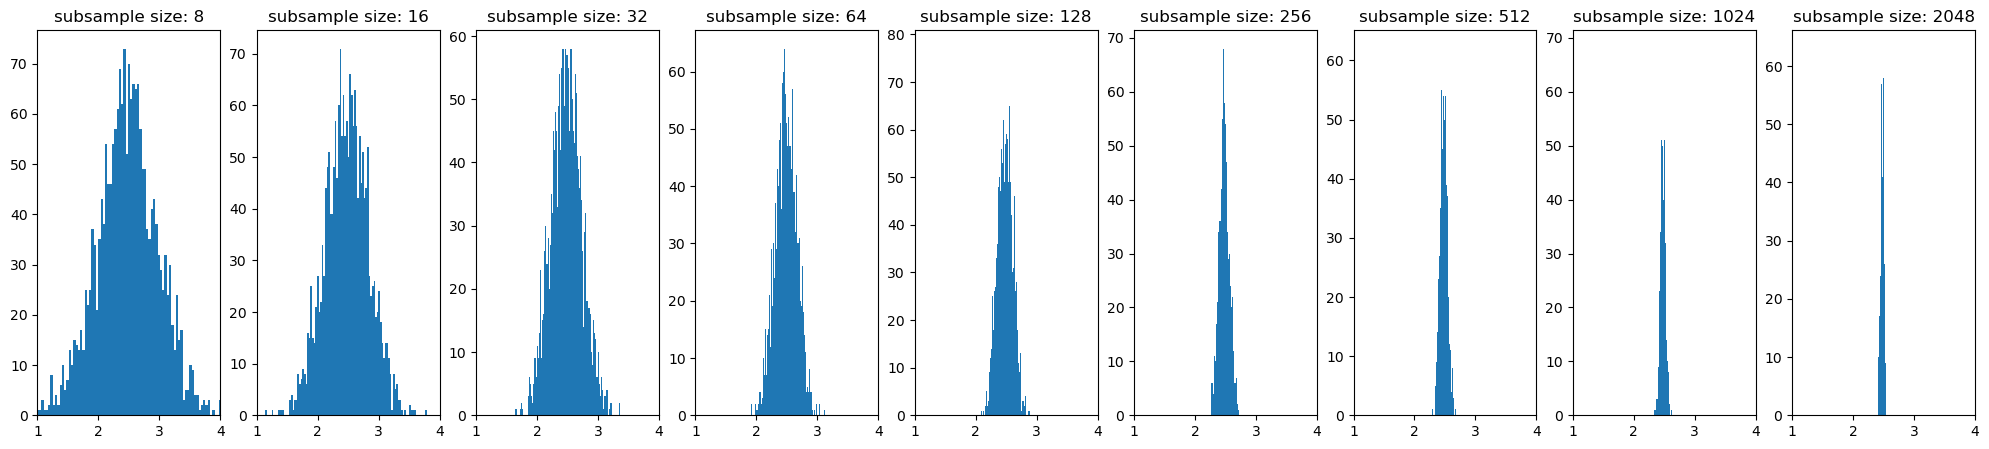

In [43]:
subsample_size = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
fig, ax = plt.subplots(1, len(subsample_size))
fig.set_size_inches(25, 5)

ax = ax.flatten()
std = np.zeros(len(subsample_size))

for idx, n in enumerate(subsample_size):
    mean = np.zeros(2000)
    for i in range(2000):
        sample = choice(s, size=n, replace=False)
        mean[i] = sample.mean()
    std[idx] = mean.std()
    ax[idx].hist(mean, bins=100)
    ax[idx].set_title('subsample size: ' + str(n))
    ax[idx].set_xlim(1, 4)

Text(0, 0.5, 'standard deviation')

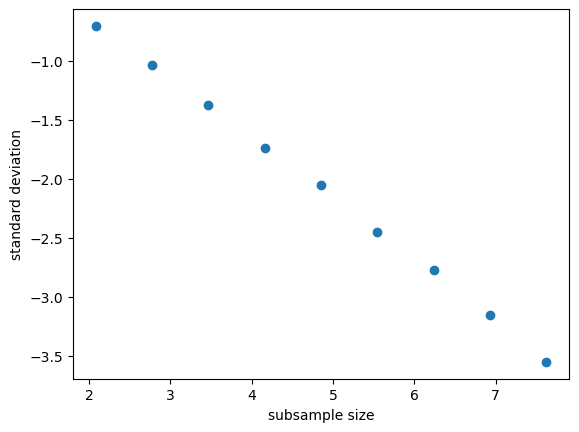

In [47]:
plt.scatter(np.log(subsample_size), np.log(std))
plt.xlabel('subsample size')
plt.ylabel('standard deviation')

As expected, the standard deviation of the sampling distribution of the mean scales $n^{-\frac{1}{2}}$